# Evaluation of Diagnostic Models

Evaluating the results of the X-ray classification model

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import util

Evaluation metric:

- Metrics
  - TP, TN, FP, FN
  - Accuracy
  - Prevalence
  - Sensitivity and Specificity
  - PPV and NPV
  - AUC
- Confidence Intervals

In [2]:
train_results = pd.read_csv("train_preds.csv")
valid_results = pd.read_csv("valid_preds.csv")

# the labels in our dataset
class_labels = ['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

# the labels for prediction values in our dataset
pred_labels = [l + "_pred" for l in class_labels]

Extract the labels (y) and the predictions (pred).

In [3]:
y = valid_results[class_labels].values
pred = valid_results[pred_labels].values

Run the next cell to view them side by side.

In [4]:
# Take a peek at our dataset
valid_results[np.concatenate([class_labels, pred_labels])].head()

Cardiomegaly  Emphysema  Effusion  Hernia  Infiltration  Mass  Nodule  \
0             0          0         0       0             0     0       0   
1             0          0         0       0             1     0       1   
2             0          0         0       0             0     0       0   
3             0          0         0       0             0     0       0   
4             0          0         0       0             0     0       0   

   Atelectasis  Pneumothorax  Pleural_Thickening  ...  Infiltration_pred  \
0            0             0                   0  ...           0.256020   
1            0             0                   0  ...           0.382199   
2            0             0                   0  ...           0.427727   
3            0             0                   0  ...           0.158596   
4            0             0                   0  ...           0.536762   

   Mass_pred  Nodule_pred  Atelectasis_pred  Pneumothorax_pred  \
0   0.266928     0.312440          0.460342           0.079453   
1   0.176825     0.465807          0.489424           0.084595   
2   0.115513     0.249030          0.035105           0.238761   
3   0.259460     0.334870          0.266489           0.073371   
4   0.198797     0.273110          0.186771           0.242122   

   Pleural_Thickening_pred  Pneumonia_pred  Fibrosis_pred  Edema_pred  \
0                 0.271495        0.276861       0.398799    0.015867   
1                 0.377318        0.363582       0.638024    0.025948   
2                 0.167095        0.166389       0.262463    0.007758   
3                 0.229834        0.191281       0.344348    0.008559   
4                 0.309786        0.411771       0.244666    0.126930   

   Consolidation_pred  
0            0.156320  
1            0.144419  
2            0.125790  
3            0.119153  
4            0.342409  

[5 rows x 28 columns]

Histogram of the number of samples for each label in the validation dataset:

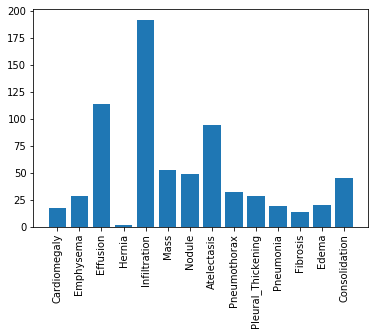

In [5]:
plt.xticks(rotation=90)
plt.bar(x = class_labels, height= y.sum(axis=0));

Our dataset has an imbalanced population of samples. Specifically, our dataset has a small number of patients diagnosed with a `Hernia`.

### True Positives, False Positives, True Negatives, and False Negatives

The most basic statistics to compute from the model predictions are the true positives, true negatives, false positives, and false negatives. 

- true positive (TP): The model classifies the example as positive, and the actual label also positive.
- false positive (FP): The model classifies the example as positive, **but** the actual label is negative.
- true negative (TN): The model classifies the example as negative, and the actual label is also negative.
- false negative (FN): The model classifies the example as negative, **but** the label is actually positive.

The model outputs real numbers between 0 and 1.
* To compute binary class predictions, we need to convert these to either 0 or 1. 
* We'll do this using a threshold value $th$.
* Any model outputs above $th$ are set to 1, and below $th$ are set to 0. 

All of our metrics (except for AUC at the end) will depend on the choice of this threshold.

In [6]:
def true_positives(y, pred, th=0.5):
    """
    Count true positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TP (int): true positives
    """
    TP = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th
    TP = np.sum((y == 1) & (thresholded_preds == 1))
    
    return TP

def true_negatives(y, pred, th=0.5):
    """
    Count true negatives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TN (int): true negatives
    """
    TN = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th

    
    # compute TN
    TN = np.sum((y==0)&(thresholded_preds==0))    
    return TN

def false_positives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FP (int): false positives
    """
    FP = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th
    

    # compute FP
    FP = np.sum((y==0)&(thresholded_preds==1))    
    return FP

def false_negatives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FN (int): false negatives
    """
    FN = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th

    
    # compute FN
    FN = np.sum((y==1)&(thresholded_preds==0))    
    return FN

A summary of evaluative metrics for the model predictions for each class. 

In [8]:
util.get_performance_metrics(y, pred, class_labels)

TP   TN   FP  FN     Accuracy   Prevalence  Sensitivity  \
                                                                               
Cardiomegaly         16  814  169   1  Not Defined  Not Defined  Not Defined   
Emphysema            20  869  103   8  Not Defined  Not Defined  Not Defined   
Effusion             99  690  196  15  Not Defined  Not Defined  Not Defined   
Hernia                1  743  255   1  Not Defined  Not Defined  Not Defined   
Infiltration        114  543  265  78  Not Defined  Not Defined  Not Defined   
Mass                 40  789  158  13  Not Defined  Not Defined  Not Defined   
Nodule               28  731  220  21  Not Defined  Not Defined  Not Defined   
Atelectasis          64  657  249  30  Not Defined  Not Defined  Not Defined   
Pneumothorax         24  785  183   8  Not Defined  Not Defined  Not Defined   
Pleural_Thickening   24  713  259   4  Not Defined  Not Defined  Not Defined   
Pneumonia            14  661  320   5  Not Defined  Not Defined  Not Defined   
Fibrosis             10  725  261   4  Not Defined  Not Defined  Not Defined   
Edema                15  767  213   5  Not Defined  Not Defined  Not Defined   
Consolidation        36  658  297   9  Not Defined  Not Defined  Not Defined   

                    Specificity          PPV          NPV          AUC  \
                                                                         
Cardiomegaly        Not Defined  Not Defined  Not Defined  Not Defined   
Emphysema           Not Defined  Not Defined  Not Defined  Not Defined   
Effusion            Not Defined  Not Defined  Not Defined  Not Defined   
Hernia              Not Defined  Not Defined  Not Defined  Not Defined   
Infiltration        Not Defined  Not Defined  Not Defined  Not Defined   
Mass                Not Defined  Not Defined  Not Defined  Not Defined   
Nodule              Not Defined  Not Defined  Not Defined  Not Defined   
Atelectasis         Not Defined  Not Defined  Not Defined  Not Defined   
Pneumothorax        Not Defined  Not Defined  Not Defined  Not Defined   
Pleural_Thickening  Not Defined  Not Defined  Not Defined  Not Defined   
Pneumonia           Not Defined  Not Defined  Not Defined  Not Defined   
Fibrosis            Not Defined  Not Defined  Not Defined  Not Defined   
Edema               Not Defined  Not Defined  Not Defined  Not Defined   
Consolidation       Not Defined  Not Defined  Not Defined  Not Defined   

                             F1 Threshold  
                                           
Cardiomegaly        Not Defined       0.5  
Emphysema           Not Defined       0.5  
Effusion            Not Defined       0.5  
Hernia              Not Defined       0.5  
Infiltration        Not Defined       0.5  
Mass                Not Defined       0.5  
Nodule              Not Defined       0.5  
Atelectasis         Not Defined       0.5  
Pneumothorax        Not Defined       0.5  
Pleural_Thickening  Not Defined       0.5  
Pneumonia           Not Defined       0.5  
Fibrosis            Not Defined       0.5  
Edema               Not Defined       0.5  
Consolidation       Not Defined       0.5

### Accuracy




$$accuracy = \frac{\text{true positives} + \text{true negatives}}{\text{true positives} + \text{true negatives} + \text{false positives} + \text{false negatives}}$$



In [9]:
def get_accuracy(y, pred, th=0.5):
    """
    Compute accuracy of predictions at threshold.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        accuracy (float): accuracy of predictions at threshold
    """
    accuracy = 0.0
    
    
    # get TP, FP, TN, FN using our previously defined functions
    TP = true_positives(y, pred, th)
    FP = false_positives(y, pred, th)
    TN = true_negatives(y, pred, th)
    FN = false_negatives(y, pred, th)

    accuracy = (TP+TN)/(TP+TN+FP+FN)    
    return accuracy

In [11]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy)

TP   TN   FP  FN Accuracy   Prevalence  Sensitivity  \
                                                                           
Cardiomegaly         16  814  169   1     0.83  Not Defined  Not Defined   
Emphysema            20  869  103   8    0.889  Not Defined  Not Defined   
Effusion             99  690  196  15    0.789  Not Defined  Not Defined   
Hernia                1  743  255   1    0.744  Not Defined  Not Defined   
Infiltration        114  543  265  78    0.657  Not Defined  Not Defined   
Mass                 40  789  158  13    0.829  Not Defined  Not Defined   
Nodule               28  731  220  21    0.759  Not Defined  Not Defined   
Atelectasis          64  657  249  30    0.721  Not Defined  Not Defined   
Pneumothorax         24  785  183   8    0.809  Not Defined  Not Defined   
Pleural_Thickening   24  713  259   4    0.737  Not Defined  Not Defined   
Pneumonia            14  661  320   5    0.675  Not Defined  Not Defined   
Fibrosis             10  725  261   4    0.735  Not Defined  Not Defined   
Edema                15  767  213   5    0.782  Not Defined  Not Defined   
Consolidation        36  658  297   9    0.694  Not Defined  Not Defined   

                    Specificity          PPV          NPV          AUC  \
                                                                         
Cardiomegaly        Not Defined  Not Defined  Not Defined  Not Defined   
Emphysema           Not Defined  Not Defined  Not Defined  Not Defined   
Effusion            Not Defined  Not Defined  Not Defined  Not Defined   
Hernia              Not Defined  Not Defined  Not Defined  Not Defined   
Infiltration        Not Defined  Not Defined  Not Defined  Not Defined   
Mass                Not Defined  Not Defined  Not Defined  Not Defined   
Nodule              Not Defined  Not Defined  Not Defined  Not Defined   
Atelectasis         Not Defined  Not Defined  Not Defined  Not Defined   
Pneumothorax        Not Defined  Not Defined  Not Defined  Not Defined   
Pleural_Thickening  Not Defined  Not Defined  Not Defined  Not Defined   
Pneumonia           Not Defined  Not Defined  Not Defined  Not Defined   
Fibrosis            Not Defined  Not Defined  Not Defined  Not Defined   
Edema               Not Defined  Not Defined  Not Defined  Not Defined   
Consolidation       Not Defined  Not Defined  Not Defined  Not Defined   

                             F1 Threshold  
                                           
Cardiomegaly        Not Defined       0.5  
Emphysema           Not Defined       0.5  
Effusion            Not Defined       0.5  
Hernia              Not Defined       0.5  
Infiltration        Not Defined       0.5  
Mass                Not Defined       0.5  
Nodule              Not Defined       0.5  
Atelectasis         Not Defined       0.5  
Pneumothorax        Not Defined       0.5  
Pleural_Thickening  Not Defined       0.5  
Pneumonia           Not Defined       0.5  
Fibrosis            Not Defined       0.5  
Edema               Not Defined       0.5  
Consolidation       Not Defined       0.5

If we were to judge our model's performance based on the accuracy metric, we would say that our model is not very accurate for detecting the `Infiltration` cases (accuracy of 0.657) but pretty accurate for detecting `Emphysema` (accuracy of 0.889). 

**But is that really the case?...**

Let's imagine a model that simply predicts that any patient does **Not** have `Emphysema`, regardless of patient's measurements. Let's calculate the accuracy for such a model.

In [12]:
get_accuracy(valid_results["Emphysema"].values, np.zeros(len(valid_results)))

0.972

As you can see above, such a model would be 97% accurate! Even better than our deep learning based model. 

But is this really a good model? Wouldn't this model be wrong 100% of the time if the patient actually had this condition?

In the following sections, we will address this concern with more advanced model measures - **sensitivity and specificity** - that evaluate how well the model predicts positives for patients with the condition and negatives for cases that actually do not have the condition.

### Prevalence
* In a medical context, prevalence is the proportion of people in the population who have the disease (or condition, etc). 
* In machine learning terms, this is the proportion of positive examples. The expression for prevalence is:

$$prevalence = \frac{1}{N} \sum_{i} y_i$$

where $y_i = 1$ when the example is 'positive' (has the disease).


In [13]:
def get_prevalence(y):
    """
    Compute prevalence.

    Args:
        y (np.array): ground truth, size (n_examples)
    Returns:
        prevalence (float): prevalence of positive cases
    """
    prevalence = 0.0
    
    
    prevalence = np.mean(y)
        
    return prevalence

In [15]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence)

TP   TN   FP  FN Accuracy Prevalence  Sensitivity  \
                                                                         
Cardiomegaly         16  814  169   1     0.83      0.017  Not Defined   
Emphysema            20  869  103   8    0.889      0.028  Not Defined   
Effusion             99  690  196  15    0.789      0.114  Not Defined   
Hernia                1  743  255   1    0.744      0.002  Not Defined   
Infiltration        114  543  265  78    0.657      0.192  Not Defined   
Mass                 40  789  158  13    0.829      0.053  Not Defined   
Nodule               28  731  220  21    0.759      0.049  Not Defined   
Atelectasis          64  657  249  30    0.721      0.094  Not Defined   
Pneumothorax         24  785  183   8    0.809      0.032  Not Defined   
Pleural_Thickening   24  713  259   4    0.737      0.028  Not Defined   
Pneumonia            14  661  320   5    0.675      0.019  Not Defined   
Fibrosis             10  725  261   4    0.735      0.014  Not Defined   
Edema                15  767  213   5    0.782       0.02  Not Defined   
Consolidation        36  658  297   9    0.694      0.045  Not Defined   

                    Specificity          PPV          NPV          AUC  \
                                                                         
Cardiomegaly        Not Defined  Not Defined  Not Defined  Not Defined   
Emphysema           Not Defined  Not Defined  Not Defined  Not Defined   
Effusion            Not Defined  Not Defined  Not Defined  Not Defined   
Hernia              Not Defined  Not Defined  Not Defined  Not Defined   
Infiltration        Not Defined  Not Defined  Not Defined  Not Defined   
Mass                Not Defined  Not Defined  Not Defined  Not Defined   
Nodule              Not Defined  Not Defined  Not Defined  Not Defined   
Atelectasis         Not Defined  Not Defined  Not Defined  Not Defined   
Pneumothorax        Not Defined  Not Defined  Not Defined  Not Defined   
Pleural_Thickening  Not Defined  Not Defined  Not Defined  Not Defined   
Pneumonia           Not Defined  Not Defined  Not Defined  Not Defined   
Fibrosis            Not Defined  Not Defined  Not Defined  Not Defined   
Edema               Not Defined  Not Defined  Not Defined  Not Defined   
Consolidation       Not Defined  Not Defined  Not Defined  Not Defined   

                             F1 Threshold  
                                           
Cardiomegaly        Not Defined       0.5  
Emphysema           Not Defined       0.5  
Effusion            Not Defined       0.5  
Hernia              Not Defined       0.5  
Infiltration        Not Defined       0.5  
Mass                Not Defined       0.5  
Nodule              Not Defined       0.5  
Atelectasis         Not Defined       0.5  
Pneumothorax        Not Defined       0.5  
Pleural_Thickening  Not Defined       0.5  
Pneumonia           Not Defined       0.5  
Fibrosis            Not Defined       0.5  
Edema               Not Defined       0.5  
Consolidation       Not Defined       0.5

`Hernia` has a prevalence 0.002, which is the rarest among the studied conditions in our dataset.

### Sensitivity and Specificity
<img src="sens_spec.png" width="30%">

Sensitivity and specificity are two of the most prominent numbers that are used to measure diagnostics tests.
- Sensitivity is the probability that our test outputs positive given that the case is actually positive.
- Specificity is the probability that the test outputs negative given that the case is actually negative. 


$$sensitivity = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$

$$specificity = \frac{\text{true negatives}}{\text{true negatives} + \text{false positives}}$$



In [16]:
def get_sensitivity(y, pred, th=0.5):
    """
    Compute sensitivity of predictions at threshold.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        sensitivity (float): probability that our test outputs positive given that the case is actually positive
    """
    sensitivity = 0.0
    
    
    TP = true_positives(y, pred, th)
    FN = false_negatives(y, pred, th)

    sensitivity = TP/(TP+FN)
        
    return sensitivity

def get_specificity(y, pred, th=0.5):
    """
    Compute specificity of predictions at threshold.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        specificity (float): probability that the test outputs negative given that the case is actually negative
    """
    specificity = 0.0
    
    TN = true_negatives(y, pred, th)
    FP = false_positives(y, pred, th)
    
    specificity = TN/(TN+FP)
    
    
    return specificity

In [18]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity)

TP   TN   FP  FN Accuracy Prevalence Sensitivity  \
                                                                        
Cardiomegaly         16  814  169   1     0.83      0.017       0.941   
Emphysema            20  869  103   8    0.889      0.028       0.714   
Effusion             99  690  196  15    0.789      0.114       0.868   
Hernia                1  743  255   1    0.744      0.002         0.5   
Infiltration        114  543  265  78    0.657      0.192       0.594   
Mass                 40  789  158  13    0.829      0.053       0.755   
Nodule               28  731  220  21    0.759      0.049       0.571   
Atelectasis          64  657  249  30    0.721      0.094       0.681   
Pneumothorax         24  785  183   8    0.809      0.032        0.75   
Pleural_Thickening   24  713  259   4    0.737      0.028       0.857   
Pneumonia            14  661  320   5    0.675      0.019       0.737   
Fibrosis             10  725  261   4    0.735      0.014       0.714   
Edema                15  767  213   5    0.782       0.02        0.75   
Consolidation        36  658  297   9    0.694      0.045         0.8   

                   Specificity          PPV          NPV          AUC  \
                                                                        
Cardiomegaly             0.828  Not Defined  Not Defined  Not Defined   
Emphysema                0.894  Not Defined  Not Defined  Not Defined   
Effusion                 0.779  Not Defined  Not Defined  Not Defined   
Hernia                   0.744  Not Defined  Not Defined  Not Defined   
Infiltration             0.672  Not Defined  Not Defined  Not Defined   
Mass                     0.833  Not Defined  Not Defined  Not Defined   
Nodule                   0.769  Not Defined  Not Defined  Not Defined   
Atelectasis              0.725  Not Defined  Not Defined  Not Defined   
Pneumothorax             0.811  Not Defined  Not Defined  Not Defined   
Pleural_Thickening       0.734  Not Defined  Not Defined  Not Defined   
Pneumonia                0.674  Not Defined  Not Defined  Not Defined   
Fibrosis                 0.735  Not Defined  Not Defined  Not Defined   
Edema                    0.783  Not Defined  Not Defined  Not Defined   
Consolidation            0.689  Not Defined  Not Defined  Not Defined   

                             F1 Threshold  
                                           
Cardiomegaly        Not Defined       0.5  
Emphysema           Not Defined       0.5  
Effusion            Not Defined       0.5  
Hernia              Not Defined       0.5  
Infiltration        Not Defined       0.5  
Mass                Not Defined       0.5  
Nodule              Not Defined       0.5  
Atelectasis         Not Defined       0.5  
Pneumothorax        Not Defined       0.5  
Pleural_Thickening  Not Defined       0.5  
Pneumonia           Not Defined       0.5  
Fibrosis            Not Defined       0.5  
Edema               Not Defined       0.5  
Consolidation       Not Defined       0.5

Note that specificity and sensitivity do not depend on the prevalence of the positive class in the dataset. 
* This is because the statistics are only computed within people of the same class
* Sensitivity only considers output on people in the positive class
* Similarly, specificity only considers output on people in the negative class.

###  PPV and NPV

Diagnostically, however, sensitivity and specificity are not helpful. Sensitivity, for example, tells us the probability our test outputs positive given that the person already has the condition. Here, we are conditioning on the thing we would like to find out (whether the patient has the condition)!

What would be more helpful is the probability that the person has the disease given that our test outputs positive. That brings us to positive predictive value (PPV) and negative predictive value (NPV).

- Positive predictive value (PPV) is the probability that subjects with a positive screening test truly have the disease.
- Negative predictive value (NPV) is the probability that subjects with a negative screening test truly don't have the disease.


$$PPV = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$ 

$$NPV = \frac{\text{true negatives}}{\text{true negatives} + \text{false negatives}}$$


In [19]:
def get_ppv(y, pred, th=0.5):
    """
    Compute PPV of predictions at threshold.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        PPV (float): positive predictive value of predictions at threshold
    """
    PPV = 0.0
    
    
    TP = true_positives(y, pred, th)
    FP = false_positives(y, pred, th)
    PPV = TP/(TP+FP)
        
    return PPV

def get_npv(y, pred, th=0.5):
    """
    Compute NPV of predictions at threshold.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        NPV (float): negative predictive value of predictions at threshold
    """
    NPV = 0.0
        
    TN = true_negatives(y, pred, th)
    FN = false_negatives(y, pred, th)

    NPV = TN/(TN+FN)
        
    return NPV

In [21]:
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv)

TP   TN   FP  FN Accuracy Prevalence Sensitivity  \
                                                                        
Cardiomegaly         16  814  169   1     0.83      0.017       0.941   
Emphysema            20  869  103   8    0.889      0.028       0.714   
Effusion             99  690  196  15    0.789      0.114       0.868   
Hernia                1  743  255   1    0.744      0.002         0.5   
Infiltration        114  543  265  78    0.657      0.192       0.594   
Mass                 40  789  158  13    0.829      0.053       0.755   
Nodule               28  731  220  21    0.759      0.049       0.571   
Atelectasis          64  657  249  30    0.721      0.094       0.681   
Pneumothorax         24  785  183   8    0.809      0.032        0.75   
Pleural_Thickening   24  713  259   4    0.737      0.028       0.857   
Pneumonia            14  661  320   5    0.675      0.019       0.737   
Fibrosis             10  725  261   4    0.735      0.014       0.714   
Edema                15  767  213   5    0.782       0.02        0.75   
Consolidation        36  658  297   9    0.694      0.045         0.8   

                   Specificity    PPV    NPV          AUC           F1  \
                                                                         
Cardiomegaly             0.828  0.086  0.999  Not Defined  Not Defined   
Emphysema                0.894  0.163  0.991  Not Defined  Not Defined   
Effusion                 0.779  0.336  0.979  Not Defined  Not Defined   
Hernia                   0.744  0.004  0.999  Not Defined  Not Defined   
Infiltration             0.672  0.301  0.874  Not Defined  Not Defined   
Mass                     0.833  0.202  0.984  Not Defined  Not Defined   
Nodule                   0.769  0.113  0.972  Not Defined  Not Defined   
Atelectasis              0.725  0.204  0.956  Not Defined  Not Defined   
Pneumothorax             0.811  0.116   0.99  Not Defined  Not Defined   
Pleural_Thickening       0.734  0.085  0.994  Not Defined  Not Defined   
Pneumonia                0.674  0.042  0.992  Not Defined  Not Defined   
Fibrosis                 0.735  0.037  0.995  Not Defined  Not Defined   
Edema                    0.783  0.066  0.994  Not Defined  Not Defined   
Consolidation            0.689  0.108  0.987  Not Defined  Not Defined   

                   Threshold  
                              
Cardiomegaly             0.5  
Emphysema                0.5  
Effusion                 0.5  
Hernia                   0.5  
Infiltration             0.5  
Mass                     0.5  
Nodule                   0.5  
Atelectasis              0.5  
Pneumothorax             0.5  
Pleural_Thickening       0.5  
Pneumonia                0.5  
Fibrosis                 0.5  
Edema                    0.5  
Consolidation            0.5

Notice that despite having very high sensitivity and accuracy, the PPV of the predictions could still be very low. 

This is the case with `Edema`, for example. 
* The sensitivity for `Edema` is 0.75.
* However, given that the model predicted positive, the probability that a person has Edema (its PPV) is only 0.066!

### ROC Curve

So far we have been operating under the assumption that our model's prediction of `0.5` and above should be treated as positive and otherwise it should be treated as negative. This however was a rather arbitrary choice. One way to see this, is to look at a very informative visualization called the receiver operating characteristic (ROC) curve.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The ideal point is at the top left, with a true positive rate of 1 and a false positive rate of 0. The various points on the curve are generated by gradually changing the threshold.


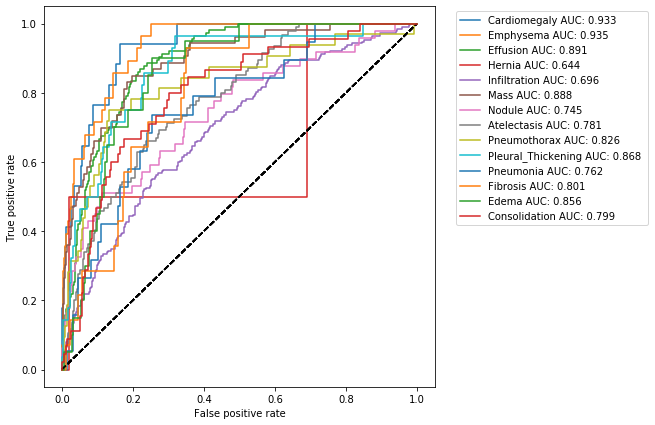

In [22]:
util.get_curve(y, pred, class_labels)

The area under the ROC curve is also called AUCROC or C-statistic and is a measure of goodness of fit. In medical literature this number also gives the probability that a randomly selected patient who experienced a condition had a higher risk score than a patient who had not experienced the event. This summarizes the model output across all thresholds, and provides a good sense of the discriminative power of a given model.

Let's use the `sklearn` metric function of `roc_auc_score` to add this score to our metrics table.

In [23]:
from sklearn.metrics import roc_auc_score
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv, auc=roc_auc_score)

TP   TN   FP  FN Accuracy Prevalence Sensitivity  \
                                                                        
Cardiomegaly         16  814  169   1     0.83      0.017       0.941   
Emphysema            20  869  103   8    0.889      0.028       0.714   
Effusion             99  690  196  15    0.789      0.114       0.868   
Hernia                1  743  255   1    0.744      0.002         0.5   
Infiltration        114  543  265  78    0.657      0.192       0.594   
Mass                 40  789  158  13    0.829      0.053       0.755   
Nodule               28  731  220  21    0.759      0.049       0.571   
Atelectasis          64  657  249  30    0.721      0.094       0.681   
Pneumothorax         24  785  183   8    0.809      0.032        0.75   
Pleural_Thickening   24  713  259   4    0.737      0.028       0.857   
Pneumonia            14  661  320   5    0.675      0.019       0.737   
Fibrosis             10  725  261   4    0.735      0.014       0.714   
Edema                15  767  213   5    0.782       0.02        0.75   
Consolidation        36  658  297   9    0.694      0.045         0.8   

                   Specificity    PPV    NPV    AUC           F1 Threshold  
                                                                            
Cardiomegaly             0.828  0.086  0.999  0.933  Not Defined       0.5  
Emphysema                0.894  0.163  0.991  0.935  Not Defined       0.5  
Effusion                 0.779  0.336  0.979  0.891  Not Defined       0.5  
Hernia                   0.744  0.004  0.999  0.644  Not Defined       0.5  
Infiltration             0.672  0.301  0.874  0.696  Not Defined       0.5  
Mass                     0.833  0.202  0.984  0.888  Not Defined       0.5  
Nodule                   0.769  0.113  0.972  0.745  Not Defined       0.5  
Atelectasis              0.725  0.204  0.956  0.781  Not Defined       0.5  
Pneumothorax             0.811  0.116   0.99  0.826  Not Defined       0.5  
Pleural_Thickening       0.734  0.085  0.994  0.868  Not Defined       0.5  
Pneumonia                0.674  0.042  0.992  0.762  Not Defined       0.5  
Fibrosis                 0.735  0.037  0.995  0.801  Not Defined       0.5  
Edema                    0.783  0.066  0.994  0.856  Not Defined       0.5  
Consolidation            0.689  0.108  0.987  0.799  Not Defined       0.5

## Confidence Intervals

Of course our dataset is only a sample of the real world, and our calculated values for all above metrics is an estimate of the real world values. It would be good to quantify this uncertainty due to the sampling of our dataset. We'll do this through the use of confidence intervals. A 95\% confidence interval for an estimate $\hat{s}$ of a parameter $s$ is an interval $I = (a, b)$ such that 95\% of the time when the experiment is run, the true value $s$ is contained in $I$. More concretely, if we were to run the experiment many times, then the fraction of those experiments for which $I$ contains the true parameter would tend towards 95\%.

While some estimates come with methods for computing the confidence interval analytically, more complicated statistics, such as the AUC for example, are difficult. For these we can use a method called the *bootstrap*. The bootstrap estimates the uncertainty by resampling the dataset with replacement. For each resampling $i$, we will get a new estimate, $\hat{s}_i$. We can then estimate the distribution of $\hat{s}$ by using the distribution of $\hat{s}_i$ for our bootstrap samples.

In the code below, we create bootstrap samples and compute sample AUCs from those samples. Note that we use stratified random sampling (sampling from the positive and negative classes separately) to make sure that members of each class are represented. 

In [24]:
def bootstrap_auc(y, pred, classes, bootstraps = 100, fold_size = 1000):
    statistics = np.zeros((len(classes), bootstraps))

    for c in range(len(classes)):
        df = pd.DataFrame(columns=['y', 'pred'])
        df.loc[:, 'y'] = y[:, c]
        df.loc[:, 'pred'] = pred[:, c]
        # get positive examples for stratified sampling
        df_pos = df[df.y == 1]
        df_neg = df[df.y == 0]
        prevalence = len(df_pos) / len(df)
        for i in range(bootstraps):
            # stratified sampling of positive and negative examples
            pos_sample = df_pos.sample(n = int(fold_size * prevalence), replace=True)
            neg_sample = df_neg.sample(n = int(fold_size * (1-prevalence)), replace=True)

            y_sample = np.concatenate([pos_sample.y.values, neg_sample.y.values])
            pred_sample = np.concatenate([pos_sample.pred.values, neg_sample.pred.values])
            score = roc_auc_score(y_sample, pred_sample)
            statistics[c][i] = score
    return statistics

statistics = bootstrap_auc(y, pred, class_labels)

Now we can compute confidence intervals from the sample statistics that we computed.

In [25]:
util.print_confidence_intervals(class_labels, statistics)

Mean AUC (CI 5%-95%)
Cardiomegaly           0.93 (0.90-0.97)
Emphysema              0.94 (0.91-0.96)
Effusion               0.89 (0.87-0.91)
Hernia                 0.62 (0.29-0.98)
Infiltration           0.70 (0.67-0.73)
Mass                   0.89 (0.85-0.93)
Nodule                 0.75 (0.68-0.80)
Atelectasis            0.78 (0.75-0.82)
Pneumothorax           0.83 (0.74-0.89)
Pleural_Thickening     0.87 (0.81-0.92)
Pneumonia              0.76 (0.69-0.82)
Fibrosis               0.81 (0.73-0.88)
Edema                  0.86 (0.81-0.89)
Consolidation          0.79 (0.74-0.84)

As you can see, our confidence intervals are much wider for some classes than for others. Hernia, for example, has an interval around (0.30 - 0.98), indicating that we can't be certain it is better than chance (at 0.5). 

##  Precision-Recall Curve


Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. 

In information retrieval
- Precision is a measure of result relevancy and that is equivalent to our previously defined PPV. 
- Recall is a measure of how many truly relevant results are returned and that is equivalent to our previously defined sensitivity measure.

The precision-recall curve (PRC) shows the trade-off between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. 

High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

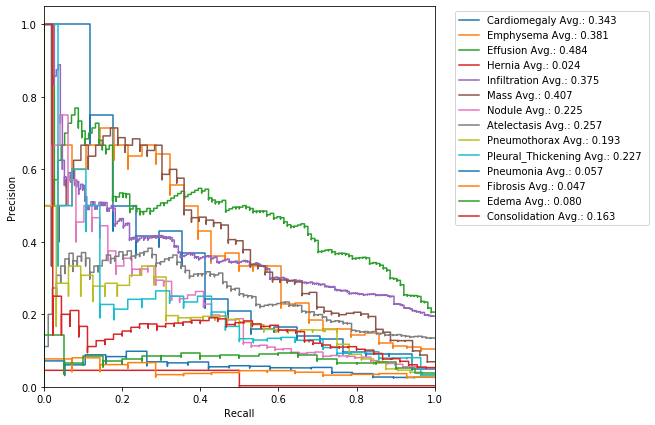

In [26]:
util.get_curve(y, pred, class_labels, curve='prc')


## F1 Score

F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 

Again, we can simply use `sklearn`'s utility metric function of `f1_score` to add this measure to our performance table.

In [27]:
from sklearn.metrics import f1_score
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv, auc=roc_auc_score,f1=f1_score)

TP   TN   FP  FN Accuracy Prevalence Sensitivity  \
                                                                        
Cardiomegaly         16  814  169   1     0.83      0.017       0.941   
Emphysema            20  869  103   8    0.889      0.028       0.714   
Effusion             99  690  196  15    0.789      0.114       0.868   
Hernia                1  743  255   1    0.744      0.002         0.5   
Infiltration        114  543  265  78    0.657      0.192       0.594   
Mass                 40  789  158  13    0.829      0.053       0.755   
Nodule               28  731  220  21    0.759      0.049       0.571   
Atelectasis          64  657  249  30    0.721      0.094       0.681   
Pneumothorax         24  785  183   8    0.809      0.032        0.75   
Pleural_Thickening   24  713  259   4    0.737      0.028       0.857   
Pneumonia            14  661  320   5    0.675      0.019       0.737   
Fibrosis             10  725  261   4    0.735      0.014       0.714   
Edema                15  767  213   5    0.782       0.02        0.75   
Consolidation        36  658  297   9    0.694      0.045         0.8   

                   Specificity    PPV    NPV    AUC     F1 Threshold  
                                                                      
Cardiomegaly             0.828  0.086  0.999  0.933  0.158       0.5  
Emphysema                0.894  0.163  0.991  0.935  0.265       0.5  
Effusion                 0.779  0.336  0.979  0.891  0.484       0.5  
Hernia                   0.744  0.004  0.999  0.644  0.008       0.5  
Infiltration             0.672  0.301  0.874  0.696  0.399       0.5  
Mass                     0.833  0.202  0.984  0.888  0.319       0.5  
Nodule                   0.769  0.113  0.972  0.745  0.189       0.5  
Atelectasis              0.725  0.204  0.956  0.781  0.314       0.5  
Pneumothorax             0.811  0.116   0.99  0.826  0.201       0.5  
Pleural_Thickening       0.734  0.085  0.994  0.868  0.154       0.5  
Pneumonia                0.674  0.042  0.992  0.762  0.079       0.5  
Fibrosis                 0.735  0.037  0.995  0.801   0.07       0.5  
Edema                    0.783  0.066  0.994  0.856  0.121       0.5  
Consolidation            0.689  0.108  0.987  0.799   0.19       0.5

## Calibration

When performing classification we often want not only to predict the class label, but also obtain a probability of each label. This probability would ideally give us some kind of confidence on the prediction. In order to observe how our model's generated probabilities are aligned with the real probabilities, we can plot what's called a *calibration curve*. 

In order to generate a calibration plot, we first bucketize our predictions to a fixed number of separate bins (e.g. 5) between 0 and 1. We then calculate a point for each bin: the x-value for each point is the mean for the probability that our model has assigned to these points and the y-value for each point fraction of true positives in that bin. We then plot these points in a linear plot. A well-calibrated model has a calibration curve that almost aligns with the y=x line.

The `sklearn` library has a utility `calibration_curve` for generating a calibration plot. Let's use it and take a look at our model's calibration:

In [28]:
from sklearn.calibration import calibration_curve
def plot_calibration_curve(y, pred):
    plt.figure(figsize=(20, 20))
    for i in range(len(class_labels)):
        plt.subplot(4, 4, i + 1)
        fraction_of_positives, mean_predicted_value = calibration_curve(y[:,i], pred[:,i], n_bins=20)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(mean_predicted_value, fraction_of_positives, marker='.')
        plt.xlabel("Predicted Value")
        plt.ylabel("Fraction of Positives")
        plt.title(class_labels[i])
    plt.tight_layout()
    plt.show()

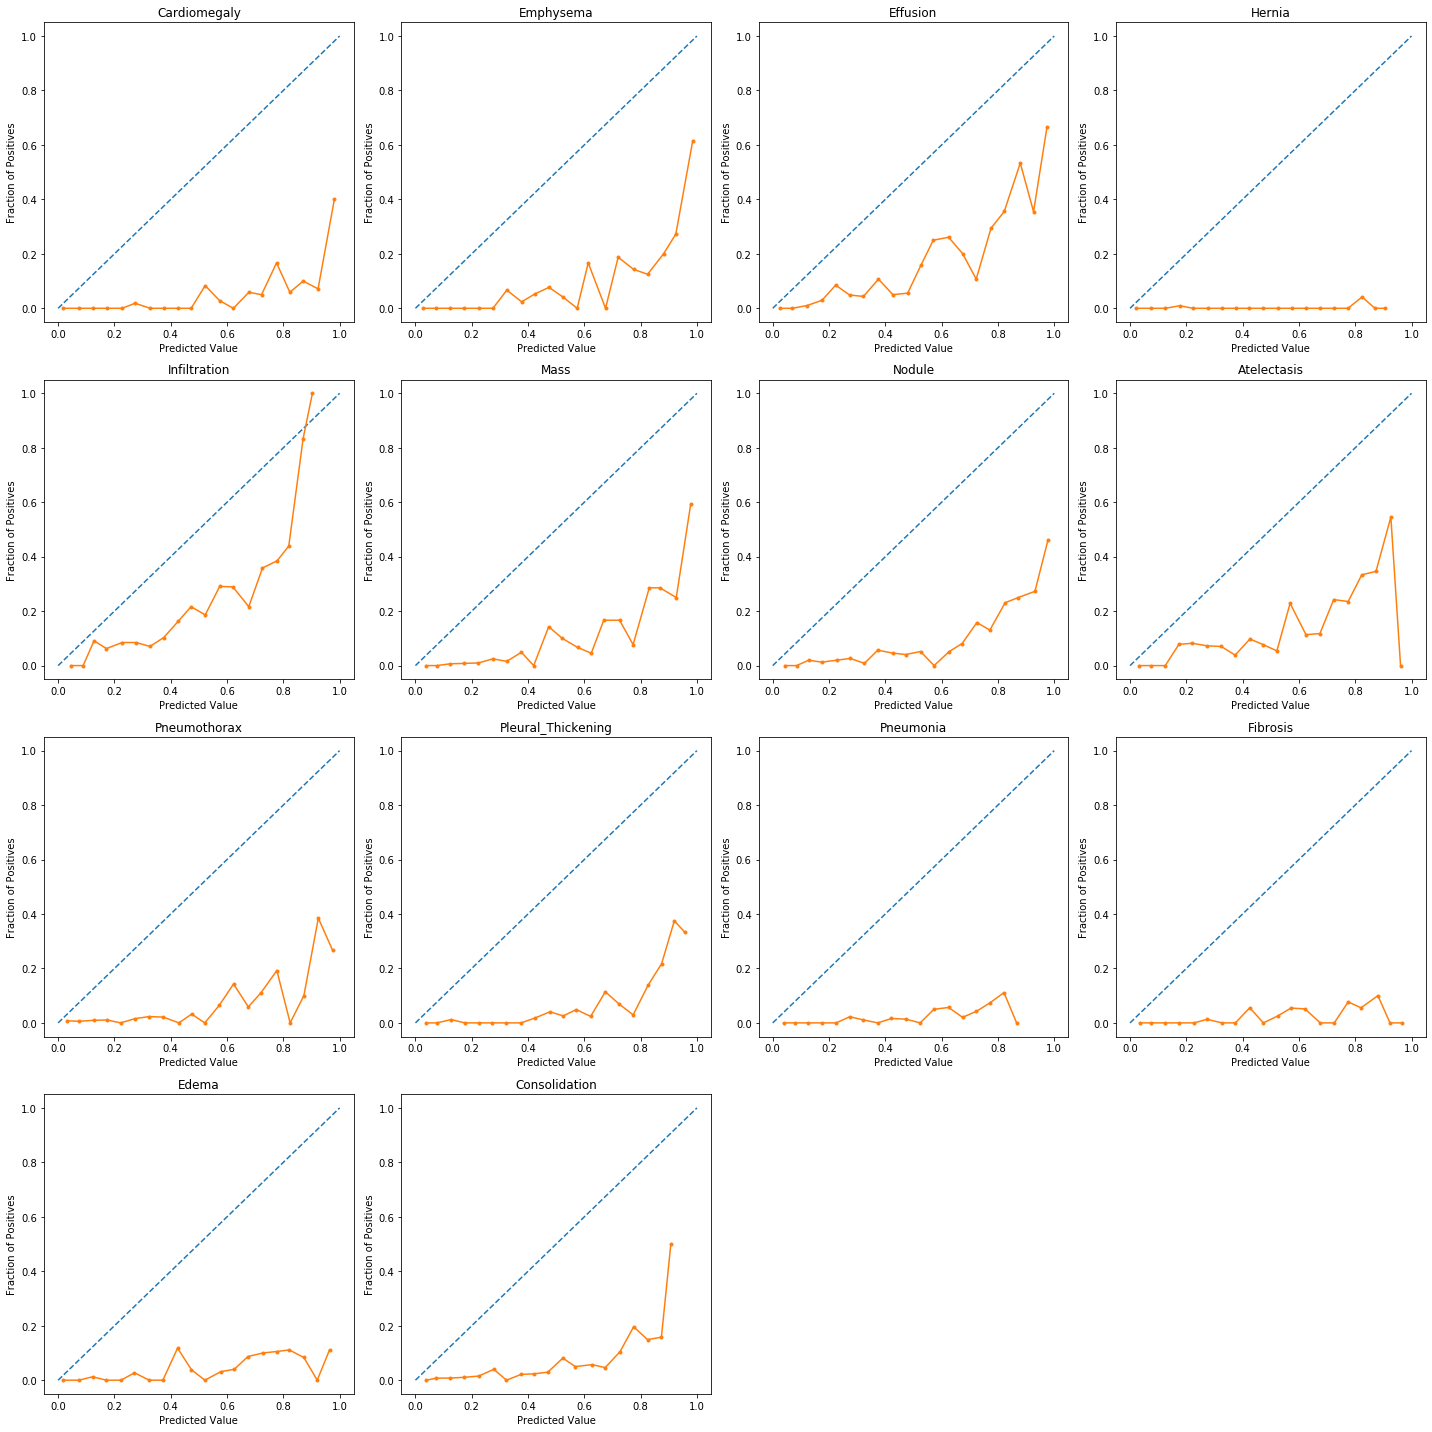

In [29]:
plot_calibration_curve(y, pred)

As the above plots show, for most predictions our model's calibration plot does not resemble a well calibrated plot. How can we fix that?...

Thankfully, there is a very useful method called [Platt scaling](https://en.wikipedia.org/wiki/Platt_scaling) which works by fitting a logistic regression model to our model's scores. To build this model, we will be using the training portion of our dataset to generate the linear model and then will use the model to calibrate the predictions for our test portion.

In [30]:
from sklearn.linear_model import LogisticRegression as LR 

y_train = train_results[class_labels].values
pred_train = train_results[pred_labels].values
pred_calibrated = np.zeros_like(pred)

for i in range(len(class_labels)):
    lr = LR(solver='liblinear', max_iter=10000)
    lr.fit(pred_train[:, i].reshape(-1, 1), y_train[:, i])    
    pred_calibrated[:, i] = lr.predict_proba(pred[:, i].reshape(-1, 1))[:,1]

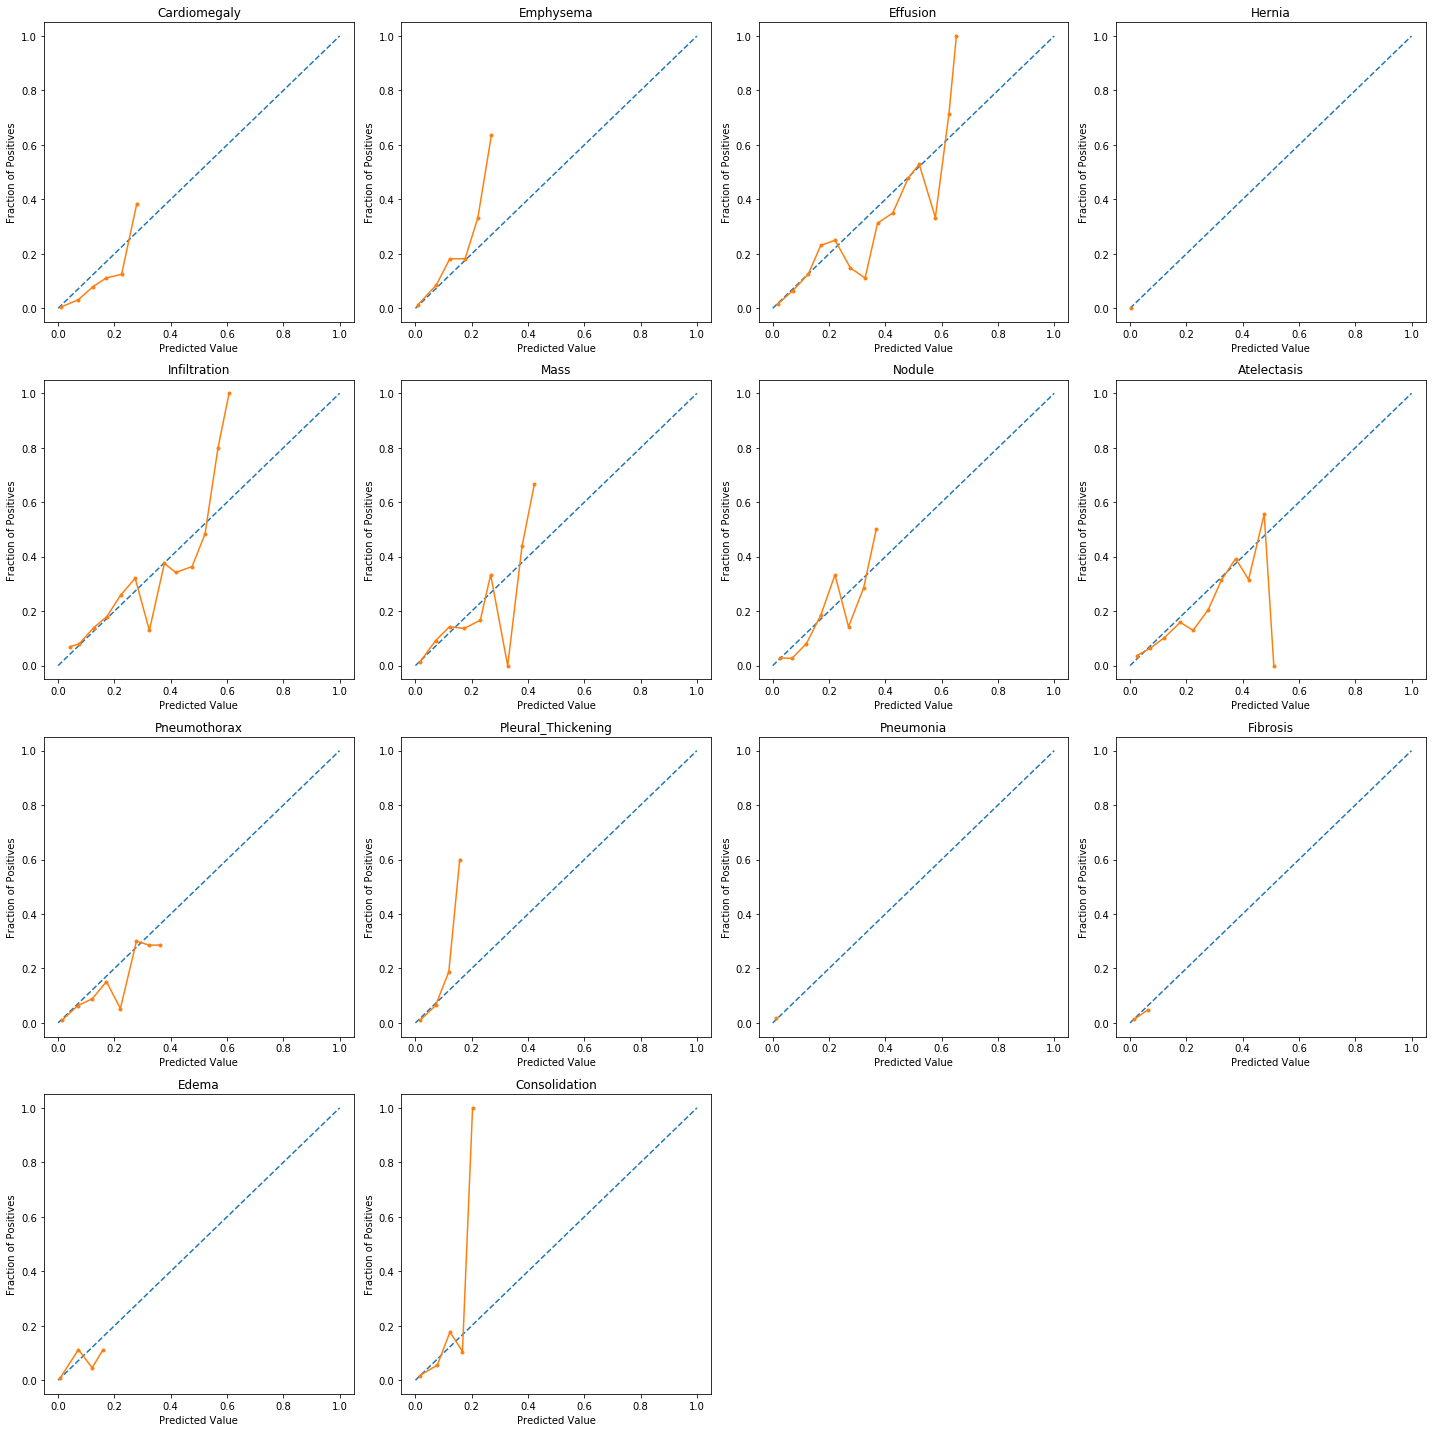

In [31]:
plot_calibration_curve(y[:,], pred_calibrated)